In [1]:
import pandas as pd
data=pd.read_csv('student_data.csv')
data.head()

C:\Users\taeeu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10


1. 시각화를 포함한 탐색적 자료분석(EDA)

In [2]:
data.info()
data['grade'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


array([ 6,  5,  8, 15,  9, 12, 18, 11, 14, 10, 13, 17, 16,  7, 19,  4,  3,
        1,  2], dtype=int64)

In [3]:
#범주형 그래프 요약
import pandas as pd
import matplotlib.pyplot as plt
grade=data['grade'].value_counts()
grade

9     50
11    40
12    39
10    36
13    34
15    31
8     29
14    28
7     19
6     17
4     15
5     12
16    12
17     9
18     9
2      7
19     4
3      3
1      1
Name: grade, dtype: int64

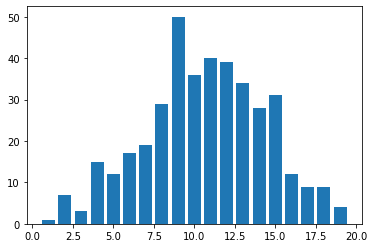

In [4]:
plt.bar(grade.index, grade.values, width=0.8, bottom=None, align='center')
plt.show()

종속변수는 1~19 사이의 수치형 변수이다. 변수는 대략적으로 정규분포를 따르는 것을 확인할 수 있다.\
\
H0:grade 변수는 정규분포를 따른다\
H1:grade 변수는 정규분포를 따르지 않는다.

In [5]:
#정규성 검정
import scipy.stats as stats
from scipy.stats import shapiro
shapiro(data['grade'])

ShapiroResult(statistic=0.9871256351470947, pvalue=0.0014306077500805259)

p-value가 0.05보다 작아 귀무가설을 기각하여 정규성을 따른다고 할 수 없다.\
또한 해당 종속변수 값이 정규성을 띄고 있고 다양한 값이 있으므로 다중 classification으로\
예측하는 것 보다는 회귀분석을 진행하는 것이 좋을 것으로 판단됨. 

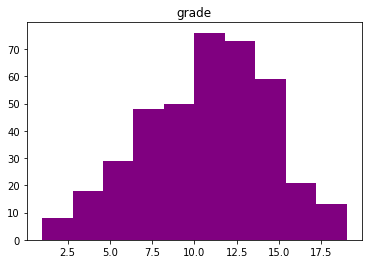

In [6]:
plt.title('grade')
plt.hist('grade', color='purple', data=data)
plt.show()

grade가 가장 많은 구간은 10-12 구간이고 그다음 많은 구간은 12.5-13구간이다

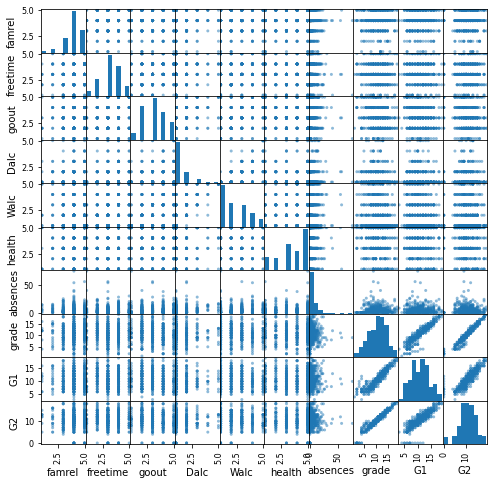

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.5, figsize=(8,8), diagonal='hist')
plt.show()

C:\Users\taeeu\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\taeeu\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\taeeu\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\taeeu\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\taeeu\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\taeeu\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

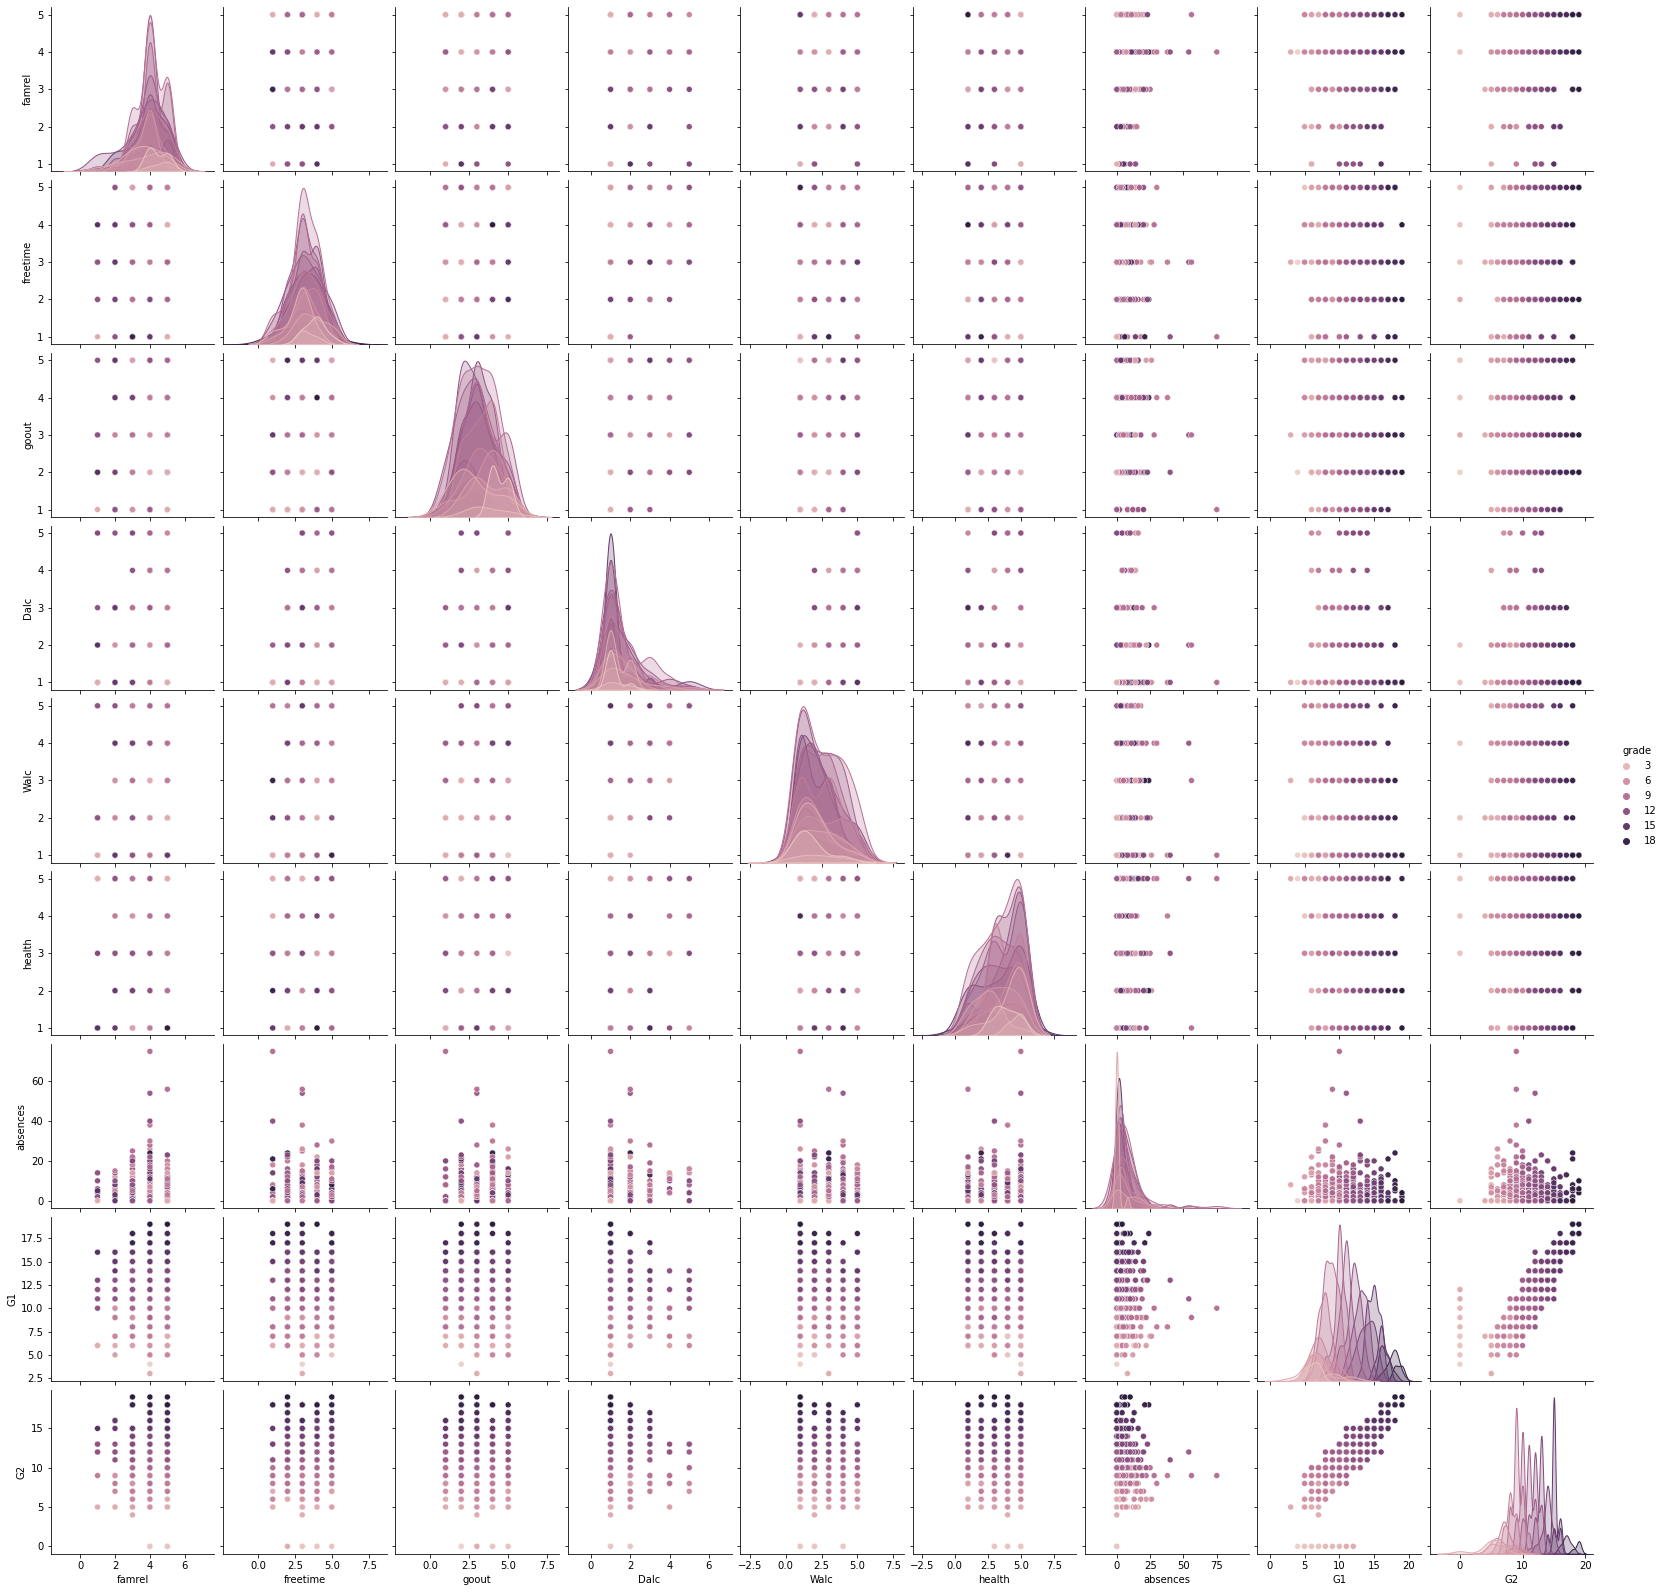

In [8]:
import seaborn as sns
sns.pairplot(data, diag_kind='auto', hue='grade')
plt.show()

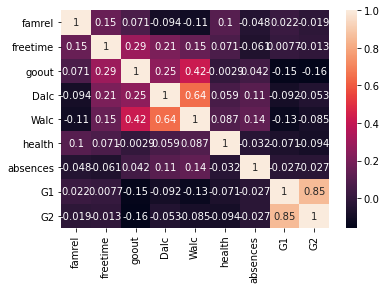

In [9]:
data_corr=data.drop(columns=['grade']).corr(method='pearson')
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=
           data_corr.columns,annot=True)
plt.show()
# "G1", "G2"의 상관관계가 높다.

<BarContainer object of 2 artists>

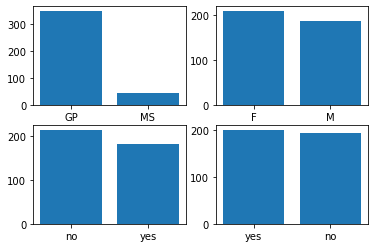

In [10]:
#범주형 변수 시각화
#school, sex, paid, activities
fig,axs=plt.subplots(2,2)
axs[0][0].bar(data['school'].value_counts().index,
             data['school'].value_counts().values)
axs[0][1].bar(data['sex'].value_counts().index,
             data['sex'].value_counts().values)
axs[1][0].bar(data['paid'].value_counts().index,
             data['paid'].value_counts().values)
axs[1][1].bar(data['activities'].value_counts().index,
             data['activities'].value_counts().values)

In [11]:
data.isna().sum().values.sum()/len(data)*100

4.810126582278481

1)결측치 존재 여부\
: 전체 데이터에서 famrel, freetime, goout, Dalc, Walc, health, absences의 변수에서 결측치가 존재한다.\
결측치 개수는 전체의 약 4.8%로 결측치가 존재하는 변수는 float형태로 평균으로 대체하거나 KNN을 사용할 수 있을것임\
2)데이터 타입 설정\
: 종속변수는 int형, 독립변수는 object와 float형태로 구성되어 있다. object타입은 인코딩을 통하여 변환할 수 있을 것으로 보임.\
3)종속변수 분포\
: 종속변수는 정규분포를 따른다고 할 수 없다.\
4)종속변수와 독립변수의 관계 설명\
: 종속변수 grade와의 상관계수를 확인해 보았을 때, 수치형 변수에서는 큰 상관성이 없다. 파생 변수를 활용할 필요가 있음.\
5)독립변수 상관관계 설명\
: 독립변수끼리의 상관관계를 확인해본 결과, 다중공선성을 걱정할 만큼(0.9 이상) 독립변수끼리의 상관성이 큰 변수는 보이지 않음.\
하지만 G1과 G2의 관계는 서로 높으므로 주의할 필요가 있다.\
6)유의할점\
독립변수 중 school의 경우 비대칭성이 있으므로 주의하여야 한다.

2. 결측치를 식별, 예측하는 두가지 방법을 쓰고, 이를 선택한 이유를 설명하시오.

In [12]:
#결측치를 식별
data.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

In [13]:
#결측치가 있는 데이터만 가져옴
data[data.isna().any(axis=1)]

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
9,GP,M,yes,yes,5.0,5.0,NaN,1.0,1.0,5.0,0.0,15,14,15
14,GP,M,no,no,NaN,5.0,2.0,1.0,1.0,3.0,0.0,15,14,16
15,GP,F,no,no,4.0,4.0,4.0,1.0,2.0,2.0,NaN,14,14,14
25,GP,F,yes,no,1.0,2.0,2.0,1.0,NaN,5.0,14.0,8,6,9
39,GP,F,yes,yes,4.0,3.0,1.0,1.0,1.0,NaN,8.0,13,14,13
40,GP,F,no,yes,3.0,3.0,NaN,1.0,2.0,3.0,25.0,9,7,10
49,GP,F,no,yes,4.0,4.0,4.0,1.0,1.0,NaN,2.0,7,7,7
61,GP,F,no,yes,5.0,5.0,5.0,NaN,5.0,5.0,6.0,10,10,8
71,GP,M,no,no,3.0,3.0,3.0,NaN,1.0,3.0,0.0,10,10,10
82,GP,F,yes,no,4.0,4.0,4.0,1.0,1.0,5.0,NaN,6,7,6


결측치를 예측하는 두가지 방법
- 단순 대치법 : 수치형 변수라면, 각 컬럼의 평균이나 중앙값을 사용/명목형, 범주형 변수라면 최빈값을 사용하여 대치
- KNN : 보간법 중 결측치가 없는 컬럼들의 최근접 알고리즘을 통해 결측치가 있는 변수를 대체할 수 있음\
\
단, KNN을 이용할 때는 거리계산이 가능한 수치형 변수만 사용가능함.\
해당 데이터에서 데이터 한 행이 전부 결측치인 경우는 존재하지 않으므로 삭제보다는 대체하는 것이 좋음\
수치형 변수만 결측치가 있으므로 KNN 기법을 사용하여 대체.

In [14]:
from sklearn.impute import KNNImputer

#결측치가 있는 수치형 데이터만 추출
KNN_data=data.drop(columns=['school', 'sex', 'paid', 'activities'])

#모델링
imputer=KNNImputer()
data_filled=imputer.fit_transform(KNN_data)
#예측값 데이터프레임 변환
data_filled=pd.DataFrame(data_filled, columns=KNN_data.columns)
#결측치 채운값 덮어씌움
data[KNN_data.columns]=data_filled
data.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 이를 선택한 이유를 설명하시오.

이산형 변수 : school, sex, paid, activities가 존재, 이산형 변수이므로 boolean 타입으로\
변경하여 KNN을 이용한 결측치 처리와 머신러닝에서 변수를 사용가능하도록 변환.

In [15]:
data=pd.get_dummies(data, drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   famrel          395 non-null    float64
 1   freetime        395 non-null    float64
 2   goout           395 non-null    float64
 3   Dalc            395 non-null    float64
 4   Walc            395 non-null    float64
 5   health          395 non-null    float64
 6   absences        395 non-null    float64
 7   grade           395 non-null    float64
 8   G1              395 non-null    float64
 9   G2              395 non-null    float64
 10  school_MS       395 non-null    uint8  
 11  sex_M           395 non-null    uint8  
 12  paid_yes        395 non-null    uint8  
 13  activities_yes  395 non-null    uint8  
dtypes: float64(10), uint8(4)
memory usage: 32.5 KB


4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용하시오. 이를 선택한 이유를 설명하시오.\
- 랜덤분할 : train/test 데이터세트를 나누어서 학습된 데이터를 검증할 수 있으며, 분할 시에 무작위로 사용자가 지정하여\
비율로 분할한다. 전체 분석 데이터 중 머신러닝 모델을 학습시키기 위한 학습용 데이터와 테스트용 데이터를 나누어서 적용시키는 이유는 모델 결과가 다른 데이터에도 적용 가능한지, 일반화가 가능한지를 검증하기 위함이다.
- 층화 추출 기법 : 종속변수가 범주형 변수인 경우에는 종속변수의 클래스의 비율을 기준으로 학습용 데이터와 테스트용\
데이터의 비율이 동일하게 분할한다. 즉, 클래스의 편향을 막을 수 있다.\
\
해당 데이터는 종속변수가 연속형이므로 회귀분석 사용이므로 랜덤샘플링 분할 사용

In [16]:
from sklearn.model_selection import train_test_split

X=data.drop('grade', axis=1)
y=data['grade']

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=2022)

5. svm, xgboost, randomforest 3개 알고리즘 공통점을 쓰고 학생성적 예측 분석에 적합한 알고리즘인지 설명하시오.

공통점
1. 회귀분석과 분류분석을 모두 할 수 있는 분석알고리즘이다.
2. 모든 범주형 변수를 독립변수로 사용할 수 없어서 변환해야 한다.
3. 과대적합, 과소적합을 피하기 위해 매개변수의 설정이 필요하다.
4. 회귀분석에서 다중공선성 문제를 해결할 수 있다.

-> 해당 데이터에서는 종속변수 값이 연속형이므로 회귀분석이 적합함. 회귀분석에서 다중공선성 문제를 해결하는 것이 중요, svm은 커널트릭을 통해, xgboost와 randomforest는 트리모델을 통해 다중공선성을 해결할 수 있다. 그러므로 회귀분석을 지원하는 위 3가지 알고리즘은 연속형 변수를 예측하기에 적합하다.

6. 세가지 모델 모두 모델링해보고 가장 적합한 알고리즘을 선택하시오. 이를 선택한 이유와 모델의 한계점, 보완 가능한 부분을 설명하고, 현업에서 주의할 점 등에 대해 기술하시오.

In [21]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train),
                           columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),
                          columns=X_test.columns)

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid=[{'C':[0.1, 1, 10,100], 'gamma':[0.001, 0.01, 0.1, 1, 10]}]
grid_svm=GridSearchCV(SVR(), param_grid=param_grid, cv=5)
grid_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10]}])

In [24]:
result=pd.DataFrame(grid_svm.cv_results_['params'])
#C, gamma값 저장

In [26]:
#grid_svm.cv_results_
result['mean_test_score']=grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
15,100.0,0.001,0.960941
11,10.0,0.010,0.957198
16,100.0,0.010,0.947652
10,10.0,0.001,0.941800
6,1.0,0.010,0.921494
12,10.0,0.100,0.861286
17,100.0,0.100,0.857767
7,1.0,0.100,0.785883
5,1.0,0.001,0.303419
2,0.1,0.100,0.283644


In [27]:
#c=100, gamma=0.001
#모델 새로 생성
svr=SVR(C=100, gamma=0.01)
svr.fit(X_train_scaled, y_train)
y_pred=svr.predict(X_test_scaled)

In [33]:
print("R2:", svr.score(X_test_scaled, y_test))
import numpy as np
from sklearn.metrics import mean_squared_error
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9475143051228021
RMSE: 0.860734178047865


In [41]:
#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
rf_grid=[{'max_depth':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}]
rf=GridSearchCV(RandomForestRegressor(n_estimators=100), param_grid=rf_grid, cv=5)
rf.fit(X_train, y_train)

print(rf.best_params_)
print("R2:", rf.best_estimator_.score(X_test,y_test))
y_pred=rf.best_estimator_.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

#{'max_depth': 10, 'min_samples_split': 2}
#R2: 0.9546464200260838
#RMSE: 0.8001185872219905

#best_estimator_
#{'max_depth': 8, 'min_samples_split': 4}
#R2: 0.9560318575162887
#RMSE: 0.7878030027557532

#{'max_depth': 8, 'min_samples_split': 4}
#R2: 0.9542110774862247
#RMSE: 0.8039495280642805

{'max_depth': 8, 'min_samples_split': 4}
R2: 0.9542110774862247
RMSE: 0.8039495280642805


In [44]:
from xgboost import XGBRegressor
xgb_grid=[{'max_depth':[2,4,6,8,10]}]
xgb=GridSearchCV(XGBRegressor(n_estimators=1000), param_grid=xgb_grid, cv=5)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

print("R2:", xgb.best_estimator_.score(X_test, y_test))
y_pred=xgb.best_estimator_.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.963211004628444
RMSE: 0.7206220334000073


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

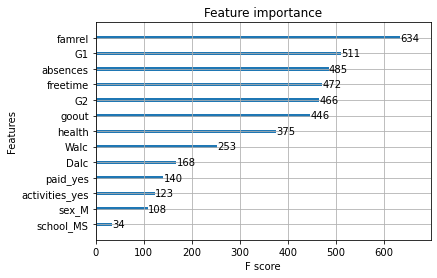

In [45]:
#정확도가 가장 높은 XGRegressor 시ㅏㄱㄱ화
from xgboost import plot_importance

plot_importance(xgb.best_estimator_)

XGBoost모델이 가장 정확도가 높고 RMSE값이 낮으므로 예측 분석력이 좋아 가장 적합한 알고리즘으로 선택.\
XGBoost 분석결과 가족친밀도인 famrel변수가 최종 성적에 영향을 많이 주는 것으로 보였다.

G1, G2가 grade와의 상관성이 매우 높은 변수이므로 좋은 결과가 나오지만, 해당 변수를 제외하고 분석하였을 때에는\
정확도가 매우 낮게 나온다. 현업에서는 정확도만을 보고 변수를 선택하는 것을 주의해야한다.

해당 모델의 주변수로 G1, G2를 사용할 수는 있지만 이 또한 성적이기 때문에 분석을 통해 성적에 영향을 미치는 변수를\
찾기에는 어려워 보인다. 머신러닝은 어떠한 독립변수를 선택하느냐에 따라 결과 해석이 완전히 달라질 수 있다.\
만약 학생의 성적에 영향을 미치는 변수를 찾고 싶다면 성적과 밀접 관련이 있는 추가적인 변수를 추가해야한다.\
그러면 모델의 정확성 뿐만 아니라 의미있는 분석이 될 것이라 생각한다.